## Tweet Emotion Recognition: Natural Language Processing with TensorFlow



Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)



## Task 1: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random
import string
from nltk.corpus import stopwords
import statistics as st
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec

C:\Users\Akshat\anaconda3\envs\akshat\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [7]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

## Task 2: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [8]:
dataset = nlp.load_dataset('emotion')

Using custom data configuration default


In [9]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [10]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [11]:
stop = set(stopwords.words('english'))
print(stop)

{'can', 'you', 'hadn', 'him', 'in', 'after', 'on', 'do', 'should', 'at', 'above', 'i', 'to', 'nor', 'own', 'my', 'm', 'only', 'some', 'themselves', 'will', "wouldn't", 'down', "shouldn't", 'here', "you've", 'having', 'wasn', 'ain', 'we', 'had', "shan't", 'yours', 'same', 'yourselves', 'very', 'until', 'further', 'for', 'that', 'was', 'than', 'needn', 'wouldn', 'under', 'how', "hadn't", "isn't", 'his', 'be', 'which', 'and', 'as', 'about', 'just', 'hers', 's', 'below', "that'll", 'are', 'out', "aren't", 'there', 'while', 'o', 'over', 'don', 'won', 'where', "mustn't", 'theirs', 'didn', 'ours', 'no', 'of', "it's", 'both', 'mightn', 'being', 'who', 'a', 'from', "couldn't", 'or', 'into', 'between', 'herself', 'whom', 'he', "won't", 're', "doesn't", 'any', 'd', 've', 'these', "you're", 'then', 't', 'those', 'ma', 'weren', 'each', 'ourselves', 'so', 'what', 'hasn', 'but', 'their', 'am', 'me', 'were', 'haven', "mightn't", 'off', 'when', "hasn't", "she's", 'the', 'other', 'why', 'itself', 'befor

In [12]:
def get_tweets(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [13]:
tweets, labels = get_tweets(train)

In [14]:
tweets[6], labels[0]

('ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'sadness')

## Task 3: Tokenizer

1. Tokenizing the tweets

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[6]]),'\n')


[[73, 48, 329, 35, 7401, 35, 196, 7402, 888, 4, 73, 2475, 1384, 7, 159, 1885, 19, 2, 117, 3, 14, 15, 455]] 



In [17]:
stop=tokenizer.texts_to_sequences(stop)
print(stop)

[[40], [31], [2220], [74], [12], [126], [30], [39], [121], [33], [1260], [2], [5], [1084], [175], [11], [93], [118], [69], [945], [59], [1], [142], [1], [136], [1], [150], [777], [4832], [82], [57], [1], [1725], [224], [1], [46], [332], [1089], [16], [9], [20], [95], [1], [1553], [736], [53], [1], [1], [107], [28], [108], [4], [29], [27], [32], [4185], [90], [1827], [1], [44], [50], [1], [81], [187], [2229], [116], [104], [863], [153], [1], [6582], [245], [1], [96], [10], [1], [493], [1], [61], [76], [7], [60], [1], [35], [106], [481], [1591], [1157], [66], [1], [372], [1], [146], [669], [290], [109], [1], [125], [43], [143], [7729], [1], [275], [1748], [15], [54], [4784], [19], [111], [24], [18], [130], [1237], [1], [169], [34], [1], [1], [6], [120], [161], [1154], [176], [21], [1], [1], [2607], [192], [133], [1], [42], [99], [1], [94], [79], [68], [1105], [1148], [129], [37], [64], [25], [262], [77], [1], [98], [1], [22], [134], [1163], [62], [23], [541], [36], [38], [1], [51], [49],

## Task 4: Removing stop words,Padding and Truncating Sequences
1. Removing stop words
2. Checking length of the tweets
3. Creating padded sequences

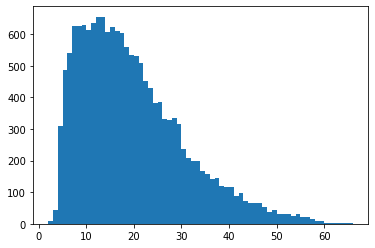

In [18]:
lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
def create_sequences(data):
    sequences=tokenizer.texts_to_sequences(data)
    return sequences

In [21]:
def remove_stop_sequences(sequence):
    cleaned=[]
    for i in sequence:
        row=[]
        for j in i:
            l=[]
            l.append(j)
            if l not in stop:
                row.append(j)
        cleaned.append(row)
    return cleaned
        

In [22]:
def get_padded_sequences(sequences,pad_length):
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=pad_length, padding='post')
    return padded_sequences

[73, 48, 329, 35, 7401, 35, 196, 7402, 888, 4, 73, 2475, 1384, 7, 159, 1885, 19, 2, 117, 3, 14, 15, 455]
[73, 329, 7401, 196, 7402, 888, 73, 2475, 1384, 159, 1885, 117, 3, 14, 455]
Average string length: 9.0273125


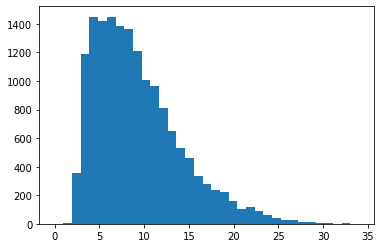

In [23]:
sequences=create_sequences(tweets)
print(sequences[6])
sequences=remove_stop_sequences(sequences)
print(sequences[6])
lengths=[]
for i in sequences:
    lengths.append(len(i))
print('Average string length:',st.mean(lengths))
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [21]:
pad_length=20
padded_train_sequences = get_padded_sequences(sequences,pad_length)
padded_train_sequences[6]

array([  73,  329, 7401,  196, 7402,  888,   73, 2475, 1384,  159, 1885,
        117,    3,   14,  455,    0,    0,    0,    0,    0])

## Task 5: Preparing the Labels

1. Handling class imbalancement
2. Creating classes to index and index to classes dictionaries
3. Converting text labels to numeric labels

In [22]:
classes = set(labels)
print(classes)

{'love', 'surprise', 'anger', 'fear', 'joy', 'sadness'}


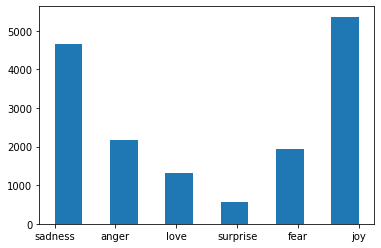

In [23]:
plt.hist(labels, bins=11)
plt.show()

In [24]:
oversample=SMOTE()
padded_train_sequences,labels=oversample.fit_resample(padded_train_sequences,labels)

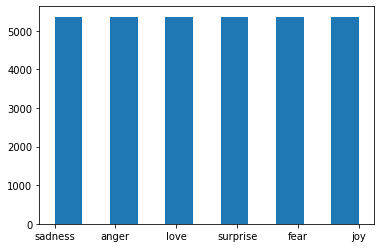

In [25]:
plt.hist(labels, bins=11)
plt.show()

In [26]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [27]:
classes_to_index

{'love': 0, 'surprise': 1, 'anger': 2, 'fear': 3, 'joy': 4, 'sadness': 5}

In [28]:
index_to_classes

{0: 'love', 1: 'surprise', 2: 'anger', 3: 'fear', 4: 'joy', 5: 'sadness'}

In [29]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [30]:
train_labels = names_to_ids(labels)
print(train_labels[0])

5


## Task 6: Creating the Model

1. Creating the model
2. Compiling the model

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 12, input_length=pad_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 12)            120000    
                                                                 
 bidirectional_8 (Bidirectio  (None, 20, 20)           1840      
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 16)               1856      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 102       
                                                                 
Total params: 123,798
Trainable params: 123,798
Non-trainable params: 0
_________________________________________________________________


## Task 7: Training the Model

1. Preparing a validation set
2. Training the model

In [45]:
val_tweets, val_labels = get_tweets(val)
sequences=create_sequences(val_tweets)
sequences=remove_stop_sequences(sequences)
padded_val_sequences = get_padded_sequences(sequences,pad_length)
val_labels = names_to_ids(val_labels)

In [46]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 5)

In [47]:
sequences[0],padded_val_sequences[0]

([17, 8, 157, 260, 343, 212, 533],
 array([ 17,   8, 157, 260, 343, 212, 533,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]))

In [48]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(padded_val_sequences, val_labels),
    epochs=30,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min', patience=10)
    ]
)

Epoch 1/30
1006/1006 [==============================] - 20s 16ms/step - loss: 1.4322 - accuracy: 0.3944 - val_loss: 0.7571 - val_accuracy: 0.7680
Epoch 2/30
1006/1006 [==============================] - 17s 17ms/step - loss: 1.1051 - accuracy: 0.5588 - val_loss: 0.6105 - val_accuracy: 0.8290
Epoch 3/30
1006/1006 [==============================] - 15s 15ms/step - loss: 1.0107 - accuracy: 0.5960 - val_loss: 0.5625 - val_accuracy: 0.8425
Epoch 4/30
1006/1006 [==============================] - 15s 15ms/step - loss: 0.9404 - accuracy: 0.6246 - val_loss: 0.4903 - val_accuracy: 0.8615
Epoch 5/30
1006/1006 [==============================] - 15s 15ms/step - loss: 0.8893 - accuracy: 0.6452 - val_loss: 0.5476 - val_accuracy: 0.8485
Epoch 6/30
1006/1006 [==============================] - 15s 15ms/step - loss: 0.8461 - accuracy: 0.6650 - val_loss: 0.5227 - val_accuracy: 0.8510
Epoch 7/30
1006/1006 [==============================] - 15s 15ms/step - loss: 0.8100 - accuracy: 0.6811 - val_loss: 0.5839 -

## Task 8: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

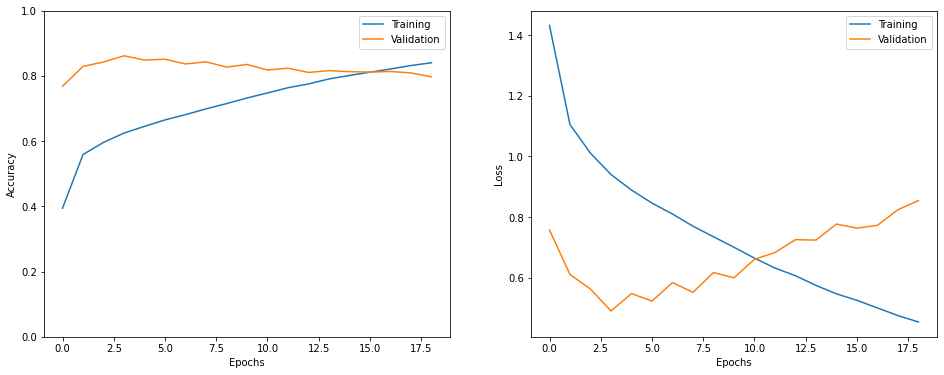

In [49]:
show_history(h)

In [50]:
test_tweets, test_labels = get_tweets(test)
sequences=create_sequences(test_tweets)
sequences=remove_stop_sequences(sequences)
padded_test_sequences = get_padded_sequences(sequences,pad_length)
test_labels = names_to_ids(test_labels)

In [51]:
_ = model.evaluate(padded_test_sequences, test_labels)

63/63 [==============================] - 1s 8ms/step - loss: 0.8900 - accuracy: 0.7975


In [53]:
i = random.randint(0, len(test_labels) - 1)

print('Sentence:', test_tweets[i])
print('Emotion:', index_to_classes[test_labels[i]])

p = model.predict(np.expand_dims(padded_test_sequences[i], axis=0))[0]

print('Predicted Emotion:', index_to_classes.get(p.argmax(axis=-1)))

Sentence: i am feeling much more relaxed
Emotion: joy
Predicted Emotion: joy


In [54]:
preds = model.predict(padded_test_sequences)
preds.shape, test_labels.shape

((2000, 6), (2000,))

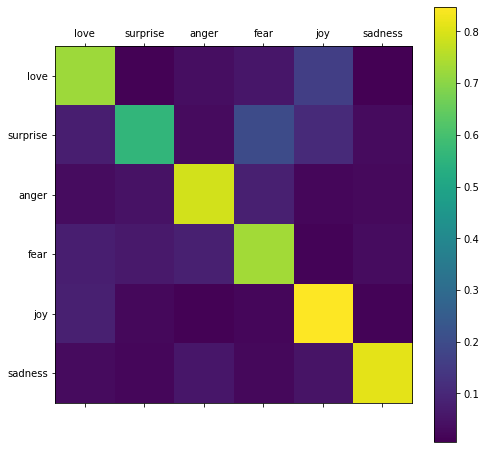

In [55]:
show_confusion_matrix(test_labels, preds.argmax(axis=-1), list(classes))